In [2]:
%tensorflow_version 1.x
import tensorflow
print(tensorflow.__version__)

TensorFlow 1.x selected.
1.15.2


In [1]:
!nvidia-smi

Sun Mar 27 05:00:52 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla K80           Off  | 00000000:00:04.0 Off |                    0 |
| N/A   39C    P8    26W / 149W |      0MiB / 11441MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [3]:
project_path ="/content/drive/MyDrive/final/"

In [4]:
import pandas as pd
import string
from string import digits
import re
import os
from numpy import array, argmax, random, take
from sklearn.model_selection import train_test_split
import pandas as pd
from keras.models import Sequential,model_from_json
from keras.layers import Dense, LSTM, Embedding, RepeatVector,TimeDistributed,Dropout
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.callbacks import ModelCheckpoint,EarlyStopping,ReduceLROnPlateau
from keras.models import load_model
from tensorflow import keras
from keras import optimizers
import matplotlib.pyplot as plt
%matplotlib inline
# pd.set_option('display.max_colwidth', 200)

Using TensorFlow backend.


In [7]:
english_sentances = []
telugu_sentances = []
with open("/content/drive/MyDrive/final/english_telugu_data.txt", mode='rt', encoding='utf-8') as fp:
    for line in fp.readlines():
        eng_tel = line.split("++++$++++")
        english_sentances.append(eng_tel[0])
        telugu_sentances.append(eng_tel[1])

In [6]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [8]:
data = pd.DataFrame({"english_sentances":english_sentances,"telugu_sentances":telugu_sentances})

In [9]:
data.head()

,english_sentances,telugu_sentances
0,His legs are long.,అతని కాళ్ళు పొడవుగా ఉన్నాయి.\n
1,Who taught Tom how to speak French?,టామ్ ఫ్రెంచ్ మాట్లాడటం ఎలా నేర్పించారు?\n
2,I swim in the sea every day.,నేను ప్రతి రోజు సముద్రంలో ఈత కొడతాను.\n
3,Tom popped into the supermarket on his way hom...,టామ్ కొంచెం పాలు కొనడానికి ఇంటికి వెళ్ళేటప్పుడ...
4,Smoke filled the room.,పొగ గదిని నింపింది.\n


In [10]:
data.shape

(155798, 2)

In [11]:
data = data.iloc[:155798,:]

In [12]:
contraction_mapping = {"ain't": "is not", "aren't": "are not","can't": "cannot", "'cause": "because", "could've": "could have", "couldn't": "could not",
                           "didn't": "did not",  "doesn't": "does not", "don't": "do not", "hadn't": "had not", "hasn't": "has not", "haven't": "have not",
                           "he'd": "he would","he'll": "he will", "he's": "he is", "how'd": "how did", "how'd'y": "how do you", "how'll": "how will", "how's": "how is",
                           "I'd": "I would", "I'd've": "I would have", "I'll": "I will", "I'll've": "I will have","I'm": "I am", "I've": "I have", "i'd": "i would",
                           "i'd've": "i would have", "i'll": "i will",  "i'll've": "i will have","i'm": "i am", "i've": "i have", "isn't": "is not", "it'd": "it would",
                           "it'd've": "it would have", "it'll": "it will", "it'll've": "it will have","it's": "it is", "let's": "let us", "ma'am": "madam",
                           "mayn't": "may not", "might've": "might have","mightn't": "might not","mightn't've": "might not have", "must've": "must have",
                           "mustn't": "must not", "mustn't've": "must not have", "needn't": "need not", "needn't've": "need not have","o'clock": "of the clock",
                           "oughtn't": "ought not", "oughtn't've": "ought not have", "shan't": "shall not", "sha'n't": "shall not", "shan't've": "shall not have",
                           "she'd": "she would", "she'd've": "she would have", "she'll": "she will", "she'll've": "she will have", "she's": "she is",
                           "should've": "should have", "shouldn't": "should not", "shouldn't've": "should not have", "so've": "so have","so's": "so as",
                           "this's": "this is","that'd": "that would", "that'd've": "that would have", "that's": "that is", "there'd": "there would",
                           "there'd've": "there would have", "there's": "there is", "here's": "here is","they'd": "they would", "they'd've": "they would have",
                           "they'll": "they will", "they'll've": "they will have", "they're": "they are", "they've": "they have", "to've": "to have",
                           "wasn't": "was not", "we'd": "we would", "we'd've": "we would have", "we'll": "we will", "we'll've": "we will have", "we're": "we are",
                           "we've": "we have", "weren't": "were not", "what'll": "what will", "what'll've": "what will have", "what're": "what are",
                           "what's": "what is", "what've": "what have", "when's": "when is", "when've": "when have", "where'd": "where did", "where's": "where is",
                           "where've": "where have", "who'll": "who will", "who'll've": "who will have", "who's": "who is", "who've": "who have",
                           "why's": "why is", "why've": "why have", "will've": "will have", "won't": "will not", "won't've": "will not have",
                           "would've": "would have", "wouldn't": "would not", "wouldn't've": "would not have", "y'all": "you all",
                           "y'all'd": "you all would","y'all'd've": "you all would have","y'all're": "you all are","y'all've": "you all have",
                           "you'd": "you would", "you'd've": "you would have", "you'll": "you will", "you'll've": "you will have",
                           "you're": "you are", "you've": "you have"}

In [13]:
# clean english sentences
def clean_eng(text):
    # Lowercasing all chars
    # text = text.lower()
    # map contractions
    text = ' '.join([contraction_mapping[w] if w in contraction_mapping else w for w in text.split(" ")])
    # Remove quotes
    text = re.sub("'", '', text)
    # Remove all the special characters
    exclude = set(string.punctuation) # Set of all special characters
    text = ''.join([c for c in text if c not in exclude])
    # Remove all numbers from text
    remove_digits = str.maketrans('', '', digits)
    text = text.translate(remove_digits)
    # Remove extra spaces
    text= text.strip()

    return text

In [14]:
# clean telugu sentences
def clean_tel(text):
    # Lowercase all characters
    text = text.lower()
    # Remove quotes
    text = re.sub("'", '', text)
    # Remove all the special characters
    exclude = set(string.punctuation) # Set of all special characters
    text = ''.join([c for c in text if c not in exclude])
    # Remove all numbers from text
    remove_digits = str.maketrans('', '', digits)
    text = text.translate(remove_digits)
    # Remove Telugu numbers from text
    text = re.sub("[౦౧౨౩౪౫౬౭౮౯]", '', text)
    # Remove extra spaces
    text= text.strip()

    return text

In [15]:
# clean text
data_df = data.copy()
data_df["english_sentances"] = data_df["english_sentances"] .apply(lambda x: clean_eng(x))
data_df["telugu_sentances"] = data_df["telugu_sentances"] .apply(lambda x: clean_tel(x))

In [16]:
data_df.head(25)

,english_sentances,telugu_sentances
0,his legs are long,అతని కాళ్ళు పొడవుగా ఉన్నాయి
1,who taught tom how to speak french,టామ్ ఫ్రెంచ్ మాట్లాడటం ఎలా నేర్పించారు
2,i swim in the sea every day,నేను ప్రతి రోజు సముద్రంలో ఈత కొడతాను
3,tom popped into the supermarket on his way hom...,టామ్ కొంచెం పాలు కొనడానికి ఇంటికి వెళ్ళేటప్పుడ...
4,smoke filled the room,పొగ గదిని నింపింది
5,tom and mary understood each other,టామ్ మరియు మేరీ ఒకరినొకరు అర్థం చేసుకున్నారు
6,many men want to be thin too,చాలా మంది పురుషులు కూడా సన్నగా ఉండాలని కోరుకుం...
7,we need three cups,మాకు మూడు కప్పులు అవసరం
8,i warned tom not to come here,టామ్‌ను ఇక్కడికి రానివ్వమని హెచ్చరించాను
9,you two may leave,మీరిద్దరూ వెళ్ళవచ్చు


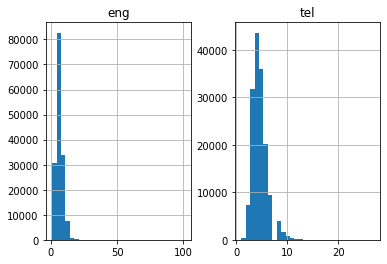

In [17]:
eng_l = []
tel_l = []
for i in data_df["english_sentances"].values:
      eng_l.append(len(i.split()))

for i in data_df["telugu_sentances"].values:
      tel_l.append(len(i.split()))

length_df = pd.DataFrame({'eng':eng_l, 'tel':tel_l})

length_df.hist(bins = 30)
plt.show()

In [18]:
# func to build tokenizer
def tokenization(lines):
    tokenizer = Tokenizer()
    tokenizer.fit_on_texts(lines)
    return tokenizer

In [19]:
# english tokenizer
eng_tokenizer = tokenization(data_df["english_sentances"])
eng_vocab_size = len(eng_tokenizer.word_index) + 1

eng_length = 43
print('English Vocabulary Size: %d' % eng_vocab_size)

English Vocabulary Size: 13912


In [20]:
# Telugu tokenizer
tel_tokenizer = tokenization(data_df["telugu_sentances"])
tel_vocab_size = len(tel_tokenizer.word_index) + 1

tel_length = 26
print('Telugu Vocabulary Size: %d' % tel_vocab_size)

Telugu Vocabulary Size: 38723


In [21]:
# encode and pad sequences
def encode_sequences(tokenizer, length, lines):
    # integer encode sequences
    seq = tokenizer.texts_to_sequences(lines)
    # pad sequences with 0 values
    seq = pad_sequences(seq, maxlen=length, padding='post')
    return seq

In [22]:
# data into train and test set
train, test = train_test_split(data_df, test_size=0.2, random_state = 12)

In [23]:
# training data
trainX = encode_sequences(eng_tokenizer, eng_length, train["english_sentances"])
trainY = encode_sequences(tel_tokenizer, tel_length, train["telugu_sentances"])

# validation data
testX = encode_sequences(eng_tokenizer, eng_length, test["english_sentances"])
testY = encode_sequences(tel_tokenizer, tel_length, test["telugu_sentances"])

In [24]:
trainX.shape,trainY.shape,testX.shape,testY.shape

((124638, 43), (124638, 26), (31160, 43), (31160, 26))

In [25]:
# build NMT model
def define_model(in_vocab,out_vocab, in_timesteps,out_timesteps,units):
    model = Sequential()
    model.add(Embedding(in_vocab, units, input_length=in_timesteps, mask_zero=True))
    model.add(LSTM(units))
    model.add(Dropout(0.1))
    model.add(RepeatVector(out_timesteps))
    model.add(LSTM(units, return_sequences=True))
    model.add(Dropout(0.1))
    model.add(TimeDistributed(Dense(out_vocab, activation='softmax')))
    return model

In [26]:
# model compilation
model = define_model(eng_vocab_size,tel_vocab_size,eng_length,tel_length, 512)
model.summary()

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 43, 512)           7122944   
_________________________________________________________________
lstm_1 (LSTM)                (None, 512)               2099200   
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0         
_________________________________________________________________
repeat_vector_1 (RepeatVecto (None, 26, 512)           0         
_________________________________________________________________
lstm_2 (LSTM)                (None, 26, 512)           2099200   
_________________________________________________________________
dropout_2 (

In [27]:
rms = optimizers.RMSprop()
model.compile(optimizer=rms, loss='sparse_categorical_crossentropy', metrics=['acc'])

In [28]:
filepath = project_path+'NMT_model.h5'
checkpoint = ModelCheckpoint(filepath, monitor='val_loss', verbose=1, save_best_only=True, mode='min')
reduce_alpha = ReduceLROnPlateau(monitor ='val_loss', factor = 0.2, patience = 1, min_lr = 0.001)
callbacks = [checkpoint, reduce_alpha] 

In [ ]:
# train model
history = model.fit(trainX, trainY.reshape(trainY.shape[0], trainY.shape[1], 1),
                    epochs=55, batch_size=128, validation_split = 0.2,callbacks=callbacks, verbose=1)
model.save("my_model")
model.save(project_path+"my_model")


Train on 99710 samples, validate on 24928 samples
Epoch 1/55
99710/99710 [==============================] - 506s 5ms/step - loss: 1.3168 - acc: 0.8397 - val_loss: 1.1161 - val_acc: 0.8545

Epoch 00001: val_loss improved from inf to 1.11608, saving model to /content/drive/MyDrive/final/NMT_model.h5
Epoch 2/55
99710/99710 [==============================] - 506s 5ms/step - loss: 1.0306 - acc: 0.8621 - val_loss: 0.9512 - val_acc: 0.8702

Epoch 00002: val_loss improved from 1.11608 to 0.95122, saving model to /content/drive/MyDrive/final/NMT_model.h5
Epoch 3/55
99710/99710 [==============================] - 505s 5ms/step - loss: 0.9007 - acc: 0.8743 - val_loss: 0.8590 - val_acc: 0.8795

Epoch 00003: val_loss improved from 0.95122 to 0.85899, saving model to /content/drive/MyDrive/final/NMT_model.h5
Epoch 4/55
99710/99710 [==============================] - 503s 5ms/step - loss: 0.8180 - acc: 0.8827 - val_loss: 0.8055 - val_acc: 0.8853

Epoch 00004: val_loss improved from 0.85899 to 0.80546,

In [ ]:
model_json_file=project_path+"Dropmodel.json"

In [ ]:
# serialize model to JSON
model_json = model.to_json()
with open(model_json_file, "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
model.save_weights("Dropmodel.h5")
print("Saved model to disk")

Saved model to disk


In [ ]:
# get 10 random ids of test samples
idx = random.randint(testX.shape[0], size=20)
# get 10 encoded english test samples
encoded_english_actual = testX[idx,:]
# get 10 actual english sentences 
eng_actual = test["english_sentances"].values
eng_actual = eng_actual[idx]
# get 10 actual telugu sentences
actual = test["telugu_sentances"].values
actual = actual[idx]

In [ ]:
# load model weights
model = load_model("/content/drive/MyDrive/dropoutmodelmy_model")
# predict english sentence to telugu sentence
preds = model.predict_classes(encoded_english_actual.reshape((encoded_english_actual.shape[0],encoded_english_actual.shape[1])))

In [ ]:
def get_word(n, tokenizer):
    for word, index in tokenizer.word_index.items():
        if index == n:
            return word
    return None

In [ ]:
preds_text = []
for i in preds:
    temp = []
    for j in range(len(i)):
        t = get_word(i[j], tel_tokenizer)
        if j > 0:
            if (t == get_word(i[j-1], tel_tokenizer)) or (t == None):
                temp.append('')
            else:
                temp.append(t)
        else:
            if(t == None):
                temp.append('')
            else:
                temp.append(t) 

    preds_text.append(' '.join(temp))

In [ ]:
pred_df = pd.DataFrame({'english_actual':eng_actual, 'telugu_actual' : actual, 'telugu_predicted' : preds_text})

In [ ]:
from google.colab import data_table
from vega_datasets import data

data_table.enable_dataframe_formatter()
# print 10 rows
pred_df.head(25)

,english_actual,telugu_actual,telugu_predicted
0,tom is carrying a violin under his arm,టామ్ తన చేతిలో ఒక వయోలిన్ మోస్తున్నాడు,టామ్ తన చేతిలో ఒక చేయి కలిగి
1,i am sorry i did not hear you,క్షమించండి నేను మీ మాట వినలేదు,క్షమించండి నేను మీ మాట వినలేదు ...
2,the barn is so old that the beams are beginnin...,బార్న్ చాలా పాతది కిరణాలు కుళ్ళిపోతున్నాయి,ఈ ద్వారా చాలా కాదు చాలా సులభం పడుతుంది ...
3,tom might not come back,టామ్ తిరిగి రాకపోవచ్చు,టామ్ తిరిగి
4,i have given up eating meat,నేను మాంసం తినడం మానేశాను,నేను మాంసం మానేశాను
5,i thought about tom,నేను టామ్ గురించి ఆలోచించాను,నేను టామ్ గురించి ఆలోచించాను ...
6,tom does it faster than you,టామ్ మీ కంటే వేగంగా చేస్తాడు,టామ్ మీ కంటే వేగంగా చేస్తాడు
7,do not cross the road while the signal is red,సిగ్నల్ ఎరుపుగా ఉన్నప్పుడు రహదారిని దాటవద్దు,వేడి ఉన్న తన
8,tom will unlikely do that today,టామ్ ఈ రోజు అలా చేయడు,టామ్ ఈ రోజు అలా లేకుండా అనుకోడు ...
9,tom is kind to mary,టామ్ మేరీ పట్ల దయతో ఉన్నాడు,టామ్ మేరీకి పట్ల దయ


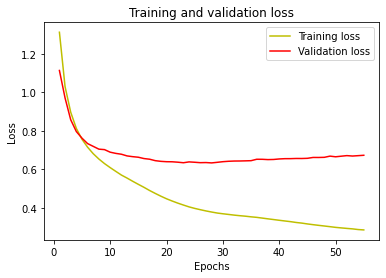

In [ ]:
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

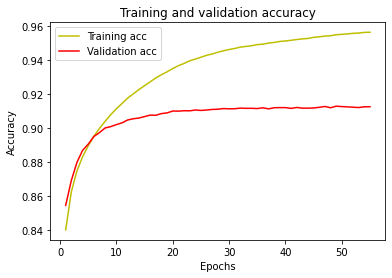

In [ ]:
acc = history.history['acc']
val_acc = history.history['val_acc']
plt.plot(epochs, acc, 'y', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [ ]:
# later...
 
# load json and create model
json_file = open('/content/drive/MyDrive/dropoutmodelDropmodel.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)
# load weights into new model
loaded_model.load_weights("/content/drive/MyDrive/dropoutmodel/Dropmodel.h5")
print("Loaded model from disk")
# evaluate loaded model on test data
loaded_model.compile(loss='sparse_categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])
score = loaded_model.evaluate(trainX, trainY.reshape(trainY.shape[0], trainY.shape[1], 1), verbose=0)
print("%s: %.2f%%" % (loaded_model.metrics_names[1], score[1]*100))

Loaded model from disk
accuracy: 96.17%


In [ ]:
# run this to load model succesfully without errors
!pip install 'h5py==2.10.0' --force-reinstall

     |████████████████████████████████| 2.9 MB 5.3 MB/s 
     |████████████████████████████████| 15.7 MB 38.6 MB/s 
  Attempting uninstall: six
    Found existing installation: six 1.15.0
    Uninstalling six-1.15.0:
      Successfully uninstalled six-1.15.0
  Attempting uninstall: numpy
    Found existing installation: numpy 1.21.5
    Uninstalling numpy-1.21.5:
      Successfully uninstalled numpy-1.21.5
  Attempting uninstall: h5py
    Found existing installation: h5py 3.1.0
    Uninstalling h5py-3.1.0:
      Successfully uninstalled h5py-3.1.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
lucid 0.3.10 requires umap-learn, which is not installed.
tensorflow 1.15.2 requires gast==0.2.2, but you have gast 0.5.3 which is incompatible.
lucid 0.3.10 requires numpy<=1.19, but you have numpy 1.21.5 which is incompatible.
kapre 0.3.7 requires tensorflow>=2.0.0, bu